# El Repressilator
El [repressilator](http://www.elowitz.caltech.edu/publications/Repressilator.pdf) es un circuito genético sintético que consiste de tres represores que se regulan en un ciclo: 
<img src="files/repressilator.png" alt="Drawing" style="width: 400px;"/> 



/Users/porfirio/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


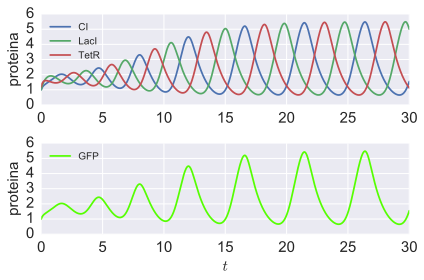

In [33]:
%matplotlib inline
import matplotlib as mpl
# Para hacer graficos SVG inline
%config InlineBackend.figure_format = 'svg'
tamano_fuente = 15
# parametros para matplotlib
params = {'xtick.labelsize':tamano_fuente,'ytick.labelsize':tamano_fuente, 
          'axes.labelsize':tamano_fuente, 'figure.autolayout':True}
# actualizar parametros
mpl.rcParams.update(params)
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.integrate import odeint

def dx_dt(x, t, beta, n, k, gamma):
    """
    Simulacion del repressilator
    """
    C, L, T, G = x
    dC_dt = beta / (1 + (T/k)**n) - gamma * C
    dL_dt = beta / (1 + (C/k)**n) - gamma * L
    dT_dt = beta / (1 + (L/k)**n) - gamma * T
    dG_dt = beta / (1 + (T/k)**n) - gamma * G
    return np.array([dC_dt, dL_dt, dT_dt, dG_dt])

# condiciones iniciales
x0 = np.array([1, 1, 1.2, 1])

# Vector de tiempo
t = np.linspace(0, 30, 1000)

# parametros
beta = 10.0
gamma = 1
n = 3
k = 1

# Resolver numericamente
x = odeint(dx_dt, x0, t, args=(beta, n, k, gamma))

# Graficar los represores
fig, axes = plt.subplots(2)
axes[0].plot(t, x[:,:-1])
axes[0].set_ylabel('proteina')
axes[0].legend(('CI', 'LacI', 'TetR'), loc=2)
axes[1].plot(t, x.T[-1], label='GFP', color='#56FE02')
axes[1].set_xlabel('$t$')
axes[1].set_ylabel('proteina')
axes[1].legend(loc=2)